# Trend Lines and Channels Detection

In [5]:
import pandas as pd
df = pd.read_csv("EURUSD_Candlestick_4_Hour_ASK_05.05.2003-16.10.2021.csv")
df.columns=['time', 'open', 'high', 'low', 'close', 'volume']
#Check if NA values are in data
df=df[df['volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.head(10)

,time,open,high,low,close,volume
0,04.05.2003 21:00:00.000,1.12354,1.12354,1.12166,1.12274,95533.0976
1,05.05.2003 01:00:00.000,1.12242,1.12276,1.12067,1.12126,93778.5996
2,05.05.2003 05:00:00.000,1.12139,1.12255,1.12030,1.12113,90924.6992
3,05.05.2003 09:00:00.000,1.12092,1.12331,1.12049,1.12174,91254.6992
4,05.05.2003 13:00:00.000,1.12194,1.12900,1.12130,1.12712,308003.4083
5,05.05.2003 17:00:00.000,1.12718,1.13019,1.12657,1.12804,373668.2930
6,05.05.2003 21:00:00.000,1.12798,1.13004,1.12772,1.12913,94283.7988
7,06.05.2003 01:00:00.000,1.12892,1.12967,1.12743,1.12855,95461.9980
8,06.05.2003 05:00:00.000,1.12856,1.13412,1.12738,1.13381,92809.0996
9,06.05.2003 09:00:00.000,1.13383,1.13662,1.13188,1.13456,90255.7988


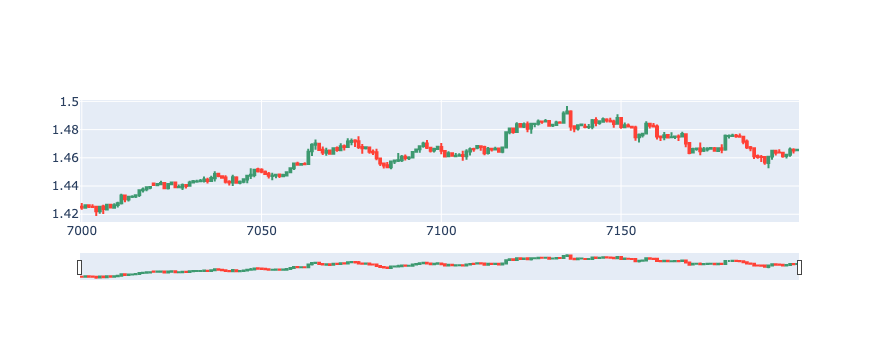

In [6]:
dfpl = df[7000:7200]
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

fig.show()

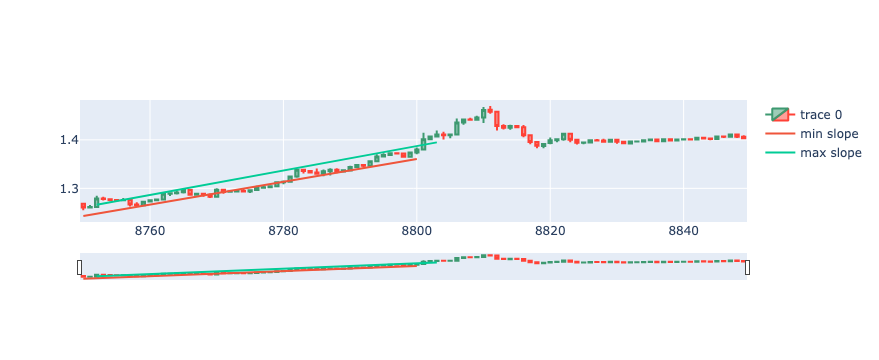

In [123]:
import numpy as np
from matplotlib import pyplot
backcandles= 50
wind = 5

candleid = 8800

maxim = np.array([])
minim = np.array([])
xxmin = np.array([])
xxmax = np.array([])
for i in range(candleid-backcandles, candleid+1, wind):
    minim = np.append(minim, df.low.iloc[i:i+wind].min())
    xxmin = np.append(xxmin, df.low.iloc[i:i+wind].idxmin())
for i in range(candleid-backcandles, candleid+1, wind):
    maxim = np.append(maxim, df.high.loc[i:i+wind].max())
    xxmax = np.append(xxmax, df.high.iloc[i:i+wind].idxmax())
slmin, intercmin = np.polyfit(xxmin, minim,1)
slmax, intercmax = np.polyfit(xxmax, maxim,1)

dfpl = df[candleid-backcandles:candleid+backcandles]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])
fig.add_trace(go.Scatter(x=xxmin, y=slmin*xxmin + intercmin, mode='lines', name='min slope'))
fig.add_trace(go.Scatter(x=xxmax, y=slmax*xxmax + intercmax, mode='lines', name='max slope'))

# Fitting intercepts to meet highest or lowest candle point in time slice

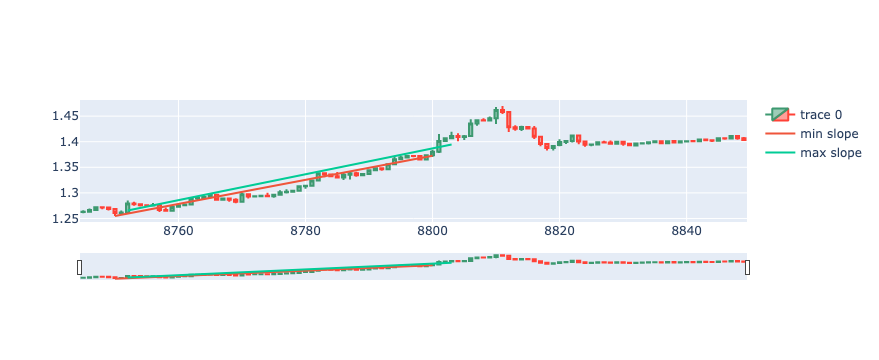

In [124]:
dfpl = df[candleid-wind-backcandles:candleid+backcandles]
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

#-------------------------------------------------------------------------
# Fitting intercepts to meet highest or lowest candle point in time slice
adjintercmin = df.low.loc[candleid-backcandles:candleid].min() - slmin*df.low.iloc[candleid-backcandles:candleid].idxmin()
adjintercmax = df.high.loc[candleid-backcandles:candleid].max() - slmax*df.high.iloc[candleid-backcandles:candleid].idxmax()
fig.add_trace(go.Scatter(x=xxmin, y=slmin*xxmin + adjintercmin, mode='lines', name='min slope'))
fig.add_trace(go.Scatter(x=xxmax, y=slmax*xxmax + adjintercmax, mode='lines', name='max slope'))
fig.show()

# Fitting intercepts to wrap price candles

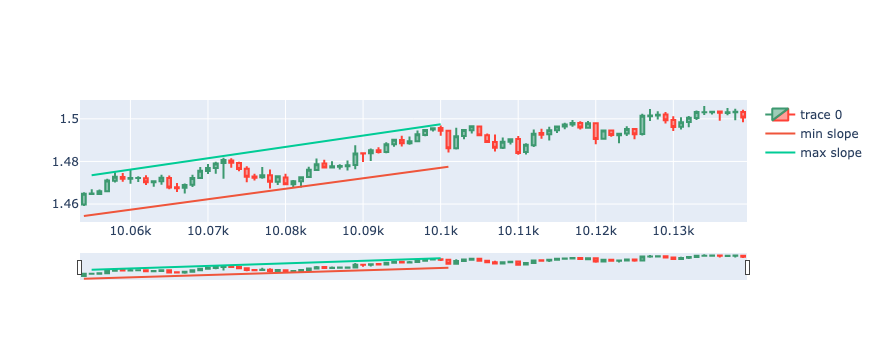

In [164]:
dfpl = df[candleid-wind-backcandles:candleid+backcandles]
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

#-------------------------------------------------------------------------
# Fitting intercepts to wrap price candles
adjintercmax = (df.high.iloc[xxmax] - slmax*xxmax).max()
adjintercmin = (df.low.iloc[xxmin] - slmin*xxmin).min()
fig.add_trace(go.Scatter(x=xxmin, y=slmin*xxmin + adjintercmin, mode='lines', name='min slope'))
fig.add_trace(go.Scatter(x=xxmax, y=slmax*xxmax + adjintercmax, mode='lines', name='max slope'))
fig.show()

# backcandles time window more dynamic

30
42
43


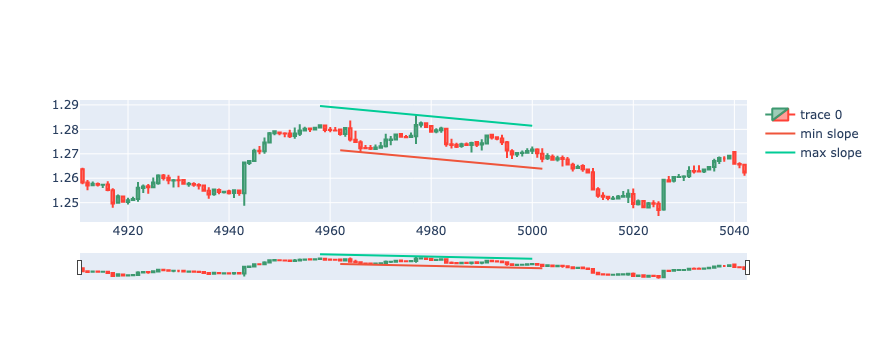

In [193]:
import numpy as np
from matplotlib import pyplot
backcandles= 40 # 6*8
brange = 10 # backcandles//4 #should be less than backcandles
wind = 6

candleid = 5000

optbackcandles= backcandles
sldiff = 10000

for r1 in range(backcandles-brange, backcandles+brange):
    maxim = np.array([])
    minim = np.array([])
    xxmin = np.array([])
    xxmax = np.array([])
    for i in range(candleid-r1, candleid+1, wind):
        minim = np.append(minim, df.low.iloc[i:i+wind].min())
        xxmin = np.append(xxmin, df.low.iloc[i:i+wind].idxmin())
    for i in range(candleid-r1, candleid+1, wind):
        maxim = np.append(maxim, df.high.loc[i:i+wind].max())
        xxmax = np.append(xxmax, df.high.iloc[i:i+wind].idxmax())
    slmin, intercmin = np.polyfit(xxmin, minim,1)
    slmax, intercmax = np.polyfit(xxmax, maxim,1)
    
    if(abs(slmin-slmax)<sldiff):
        sldiff = abs(slmin-slmax)
        optbackcandles=r1
        slminopt = slmin
        slmaxopt = slmax
        intercminopt = intercmin
        intercmaxopt = intercmax
        maximopt = maxim.copy()
        minimopt = minim.copy()
        xxminopt = xxmin.copy()
        xxmaxopt = xxmax.copy()

        print(optbackcandles)
dfpl = df[candleid-wind-optbackcandles-backcandles:candleid+optbackcandles]  
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

adjintercmax = (df.high.iloc[xxmaxopt] - slmaxopt*xxmaxopt).max()
adjintercmin = (df.low.iloc[xxminopt] - slminopt*xxminopt).min()
fig.add_trace(go.Scatter(x=xxminopt, y=slminopt*xxminopt + adjintercmin, mode='lines', name='min slope'))
fig.add_trace(go.Scatter(x=xxmaxopt, y=slmaxopt*xxmaxopt + adjintercmax, mode='lines', name='max slope'))
fig.show()

54


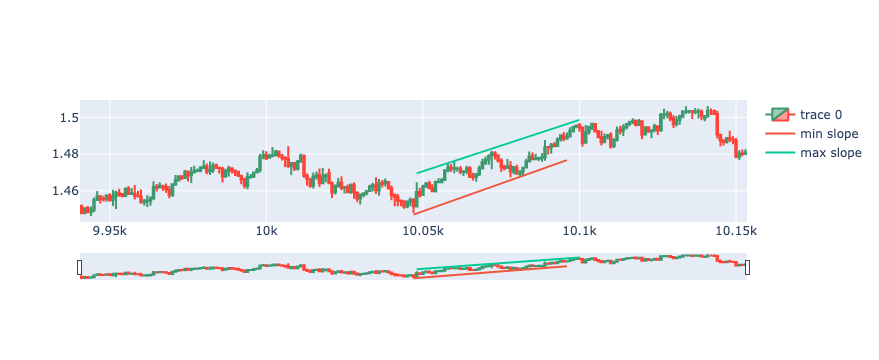

In [200]:
import numpy as np
from matplotlib import pyplot
backcandles= 100
brange = 50 #should be less than backcandles
wind = 5

candleid = 10100

optbackcandles= backcandles
sldiff = 100
sldist = 10000
for r1 in range(backcandles-brange, backcandles+brange):
    maxim = np.array([])
    minim = np.array([])
    xxmin = np.array([])
    xxmax = np.array([])
    
    for i in range(candleid-r1, candleid+1, wind):
        minim = np.append(minim, df.low.iloc[i:i+wind].min())
        xxmin = np.append(xxmin, df.low.iloc[i:i+wind].idxmin())
    for i in range(candleid-r1, candleid+1, wind):
        maxim = np.append(maxim, df.high.loc[i:i+wind].max())
        xxmax = np.append(xxmax, df.high.iloc[i:i+wind].idxmax())
    slmin, intercmin = np.polyfit(xxmin, minim,1)
    slmax, intercmax = np.polyfit(xxmax, maxim,1)
    
    dist = (slmax*candleid + intercmax)-(slmin*candleid + intercmin)
    if(dist<sldist): #abs(slmin-slmax)<sldiff and
        #sldiff = abs(slmin-slmax)
        sldist = dist
        optbackcandles=r1
        slminopt = slmin
        slmaxopt = slmax
        intercminopt = intercmin
        intercmaxopt = intercmax
        maximopt = maxim.copy()
        minimopt = minim.copy()
        xxminopt = xxmin.copy()
        xxmaxopt = xxmax.copy()

        
print(optbackcandles)
dfpl = df[candleid-wind-optbackcandles-backcandles:candleid+optbackcandles]  
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

adjintercmax = (df.high.iloc[xxmaxopt] - slmaxopt*xxmaxopt).max()
adjintercmin = (df.low.iloc[xxminopt] - slminopt*xxminopt).min()
fig.add_trace(go.Scatter(x=xxminopt, y=slminopt*xxminopt + adjintercmin, mode='lines', name='min slope'))
fig.add_trace(go.Scatter(x=xxmaxopt, y=slmaxopt*xxmaxopt + adjintercmax, mode='lines', name='max slope'))
fig.show()